# Training a DQN agent to play Mastermind

## Imports & Constants

In [1]:
import gymnasium as gym
import pandas as pd

from dqn.agents import MlpDQNAgent, MlpNoisyDQNAgent, RainbowDQNAgent
from environment import Mastermind, Code

/tmp/ipykernel_3431/3071197196.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Training

In [5]:
load_checkpoint = False

if load_checkpoint:
    env = Mastermind(code_length=4, num_colours=2, history_length=5)
else:
    env = Mastermind(code_length=4, num_colours=2, history_length=5)

In [6]:
seed = 1
num_frames = 200_000
memory_size = 1_000_000
gamma = 0.99
batch_size = 256
target_update = 5_000
epsilon_decay = 1 / (num_frames // 10)

agent = RainbowDQNAgent(
    env=env,
    memory_size=memory_size,
    batch_size=batch_size,
    target_update=target_update,
    warmup_steps=10_000,
    seed=seed,
    gamma=gamma,
)

cuda


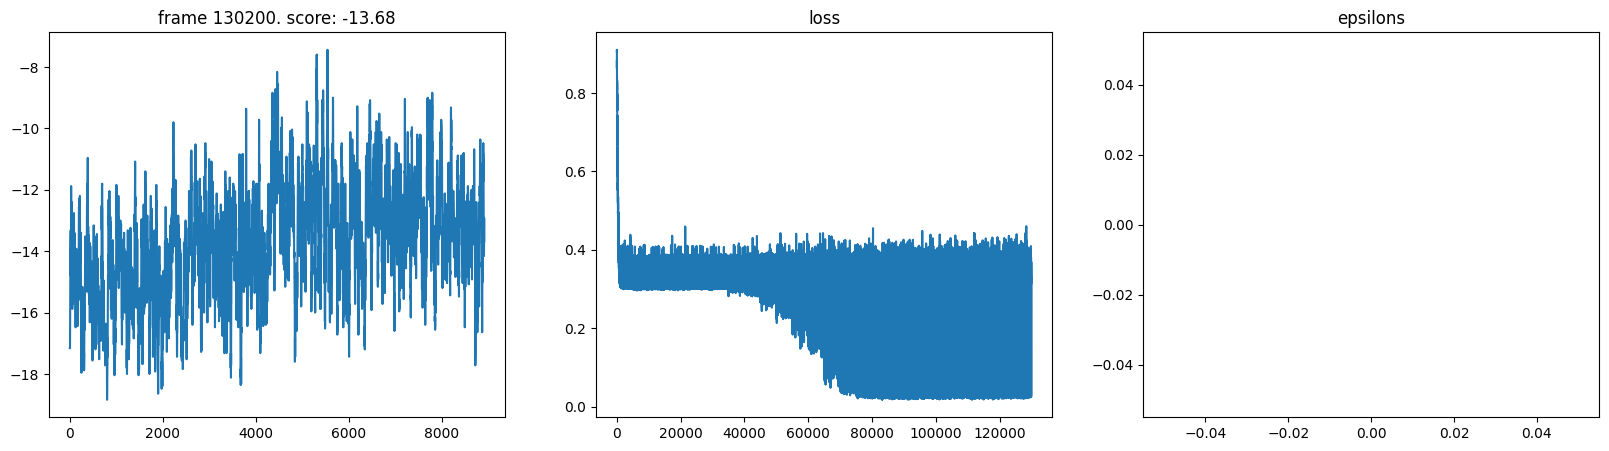

KeyboardInterrupt: 

In [7]:
scores, losses, epsilons = agent.train(num_frames)

In [9]:
pd.DataFrame({"Rainbow DQN": scores}).to_csv("./results/mastermind/rainbow_dqn.csv")

In [12]:
agent.env = env
agent.test(10, time_interval=0)

([117, 117, 113, 116, 118, 109, 115, 113, 112, 115],
 [117.0, 117.0, 113.0, 116.0, 118.0, 109.0, 115.0, 113.0, 112.0, 115.0])